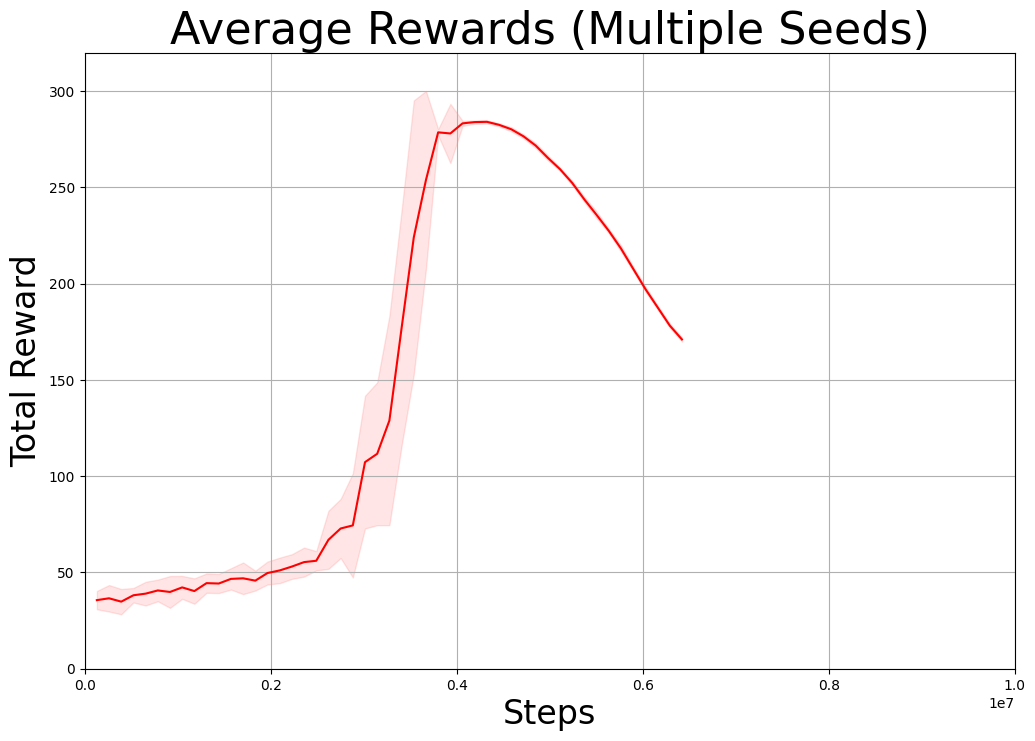

{'id': <visualiser.core.ExperimentVisualise object at 0x000001CCD4C1A990>, 'color': 'r', 'show': True, 'label': 'offline_td3_loader_test'}


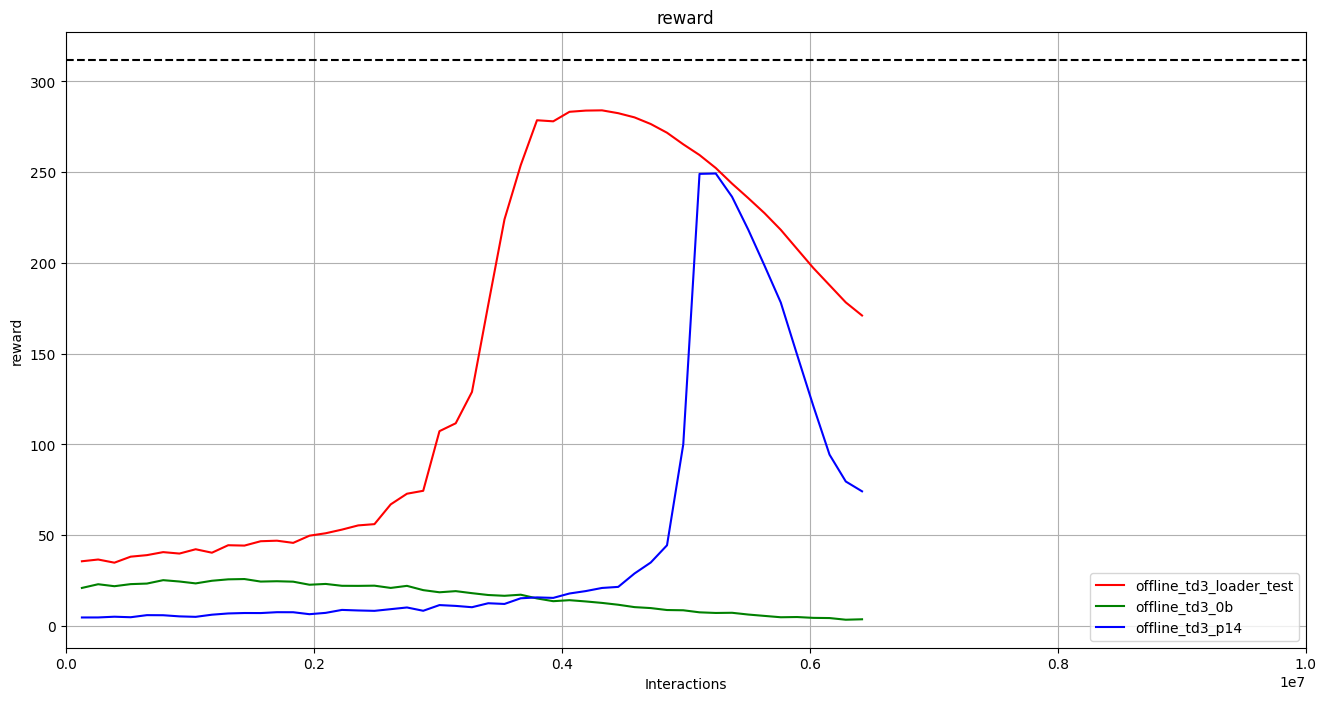

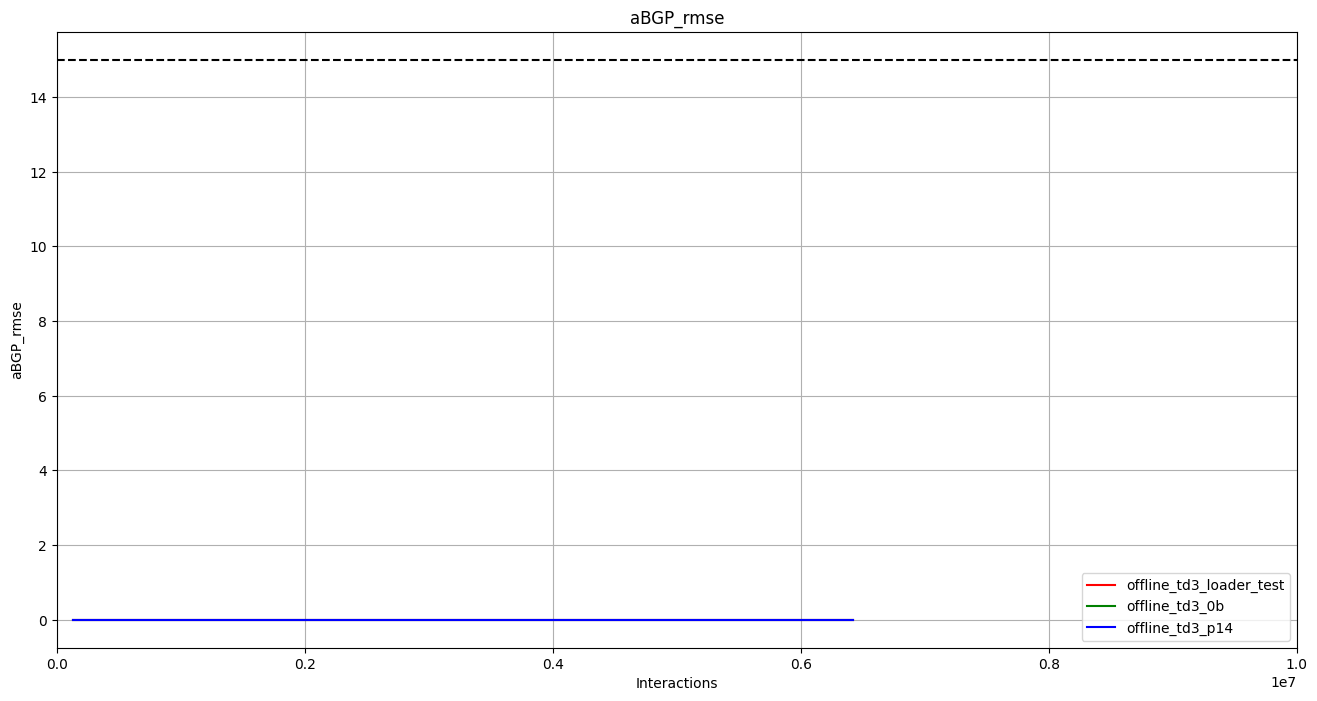

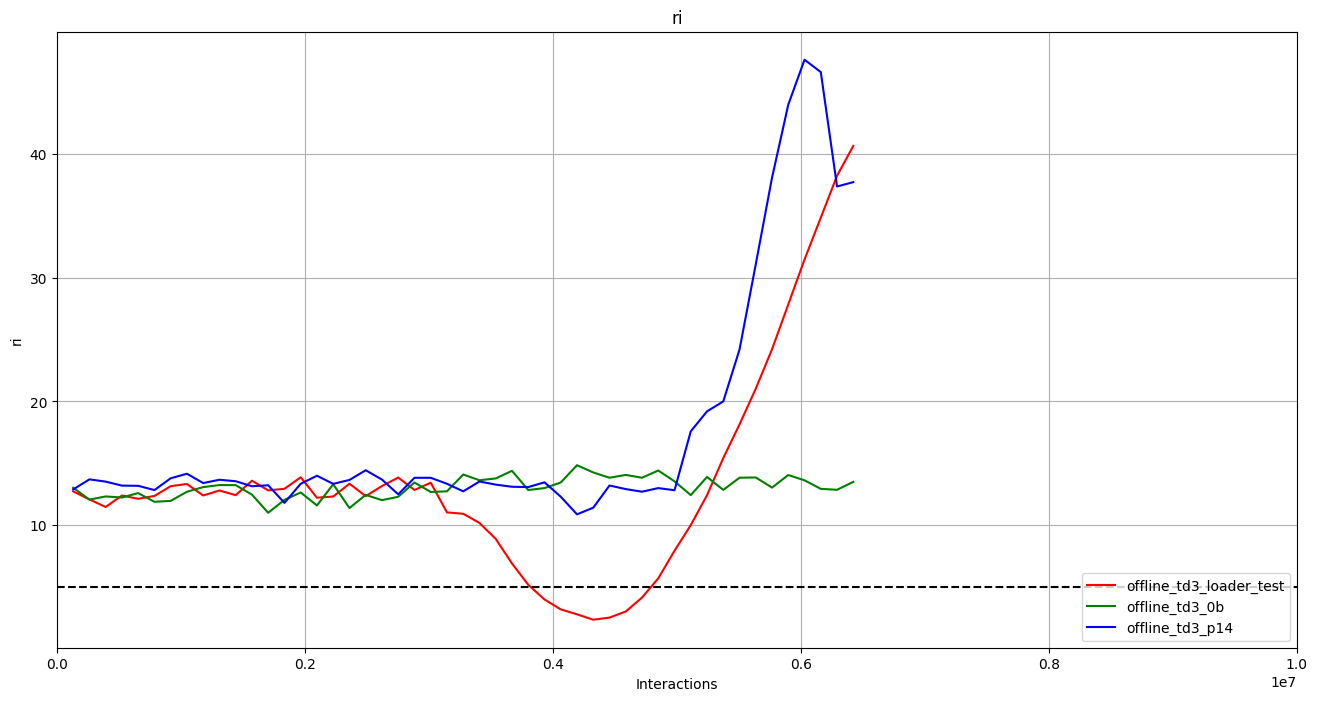

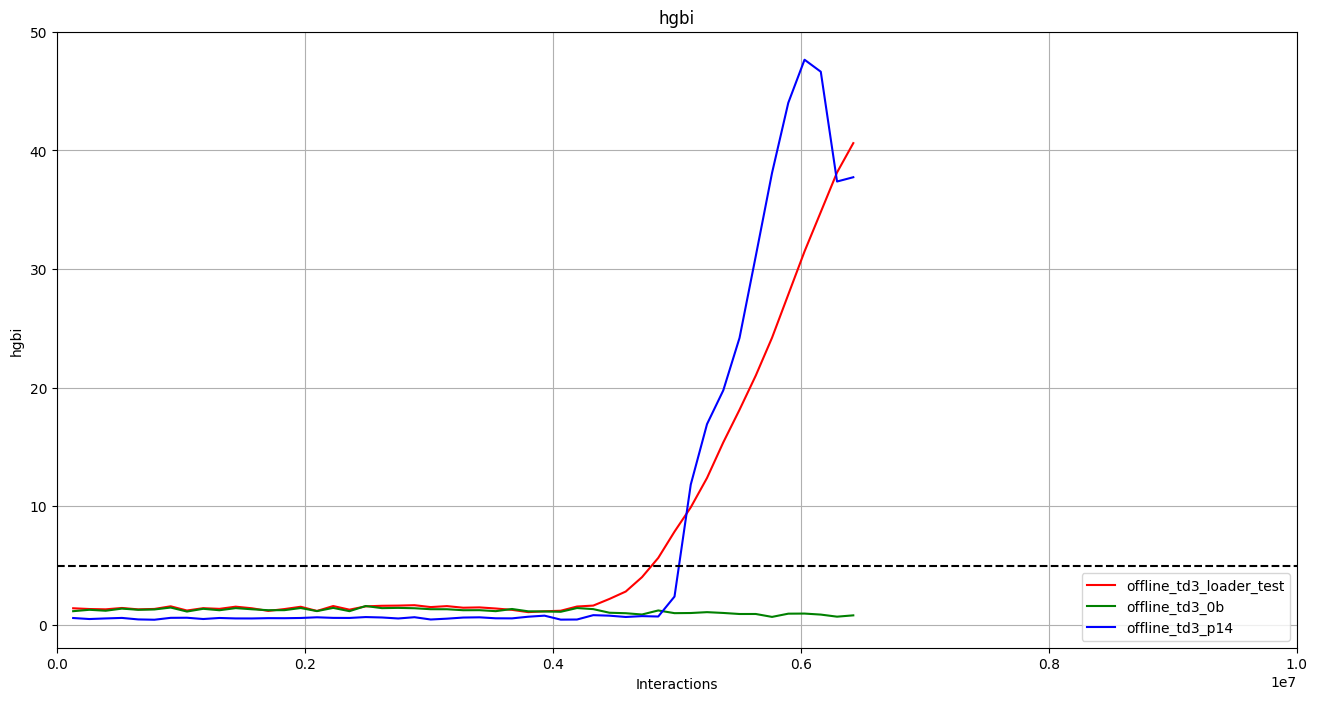

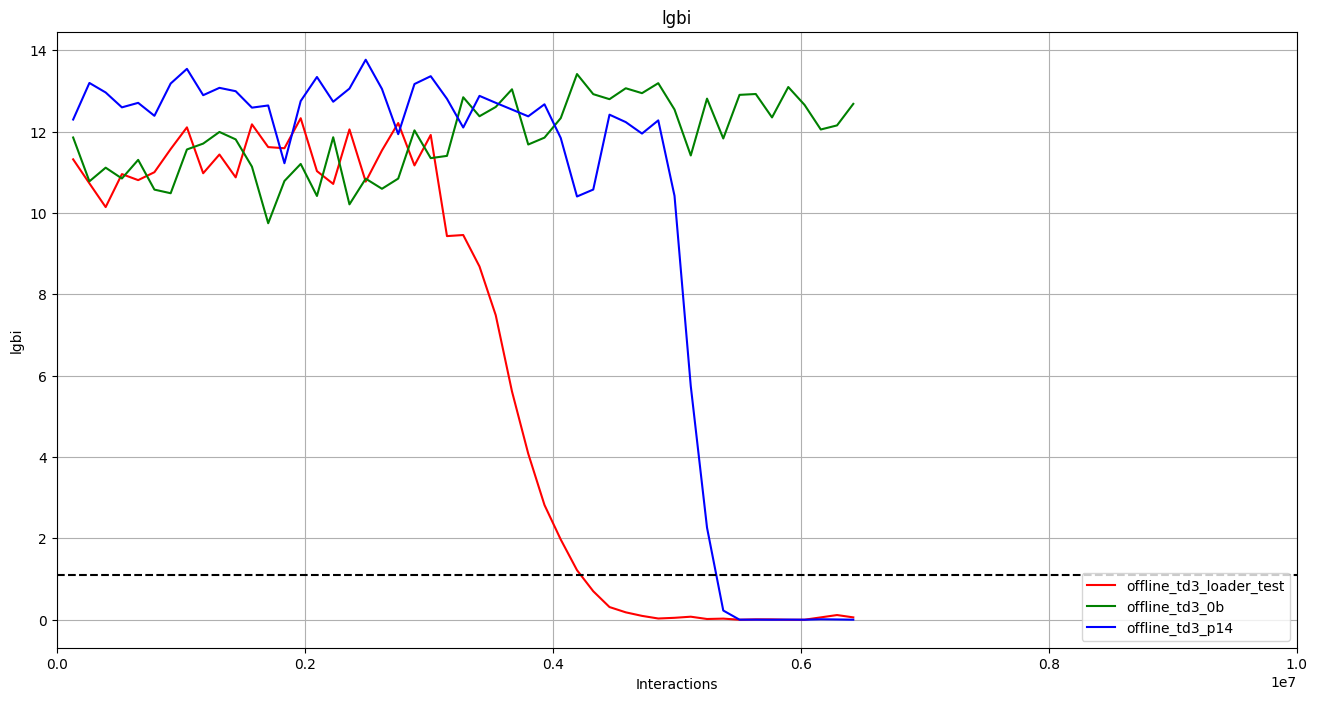

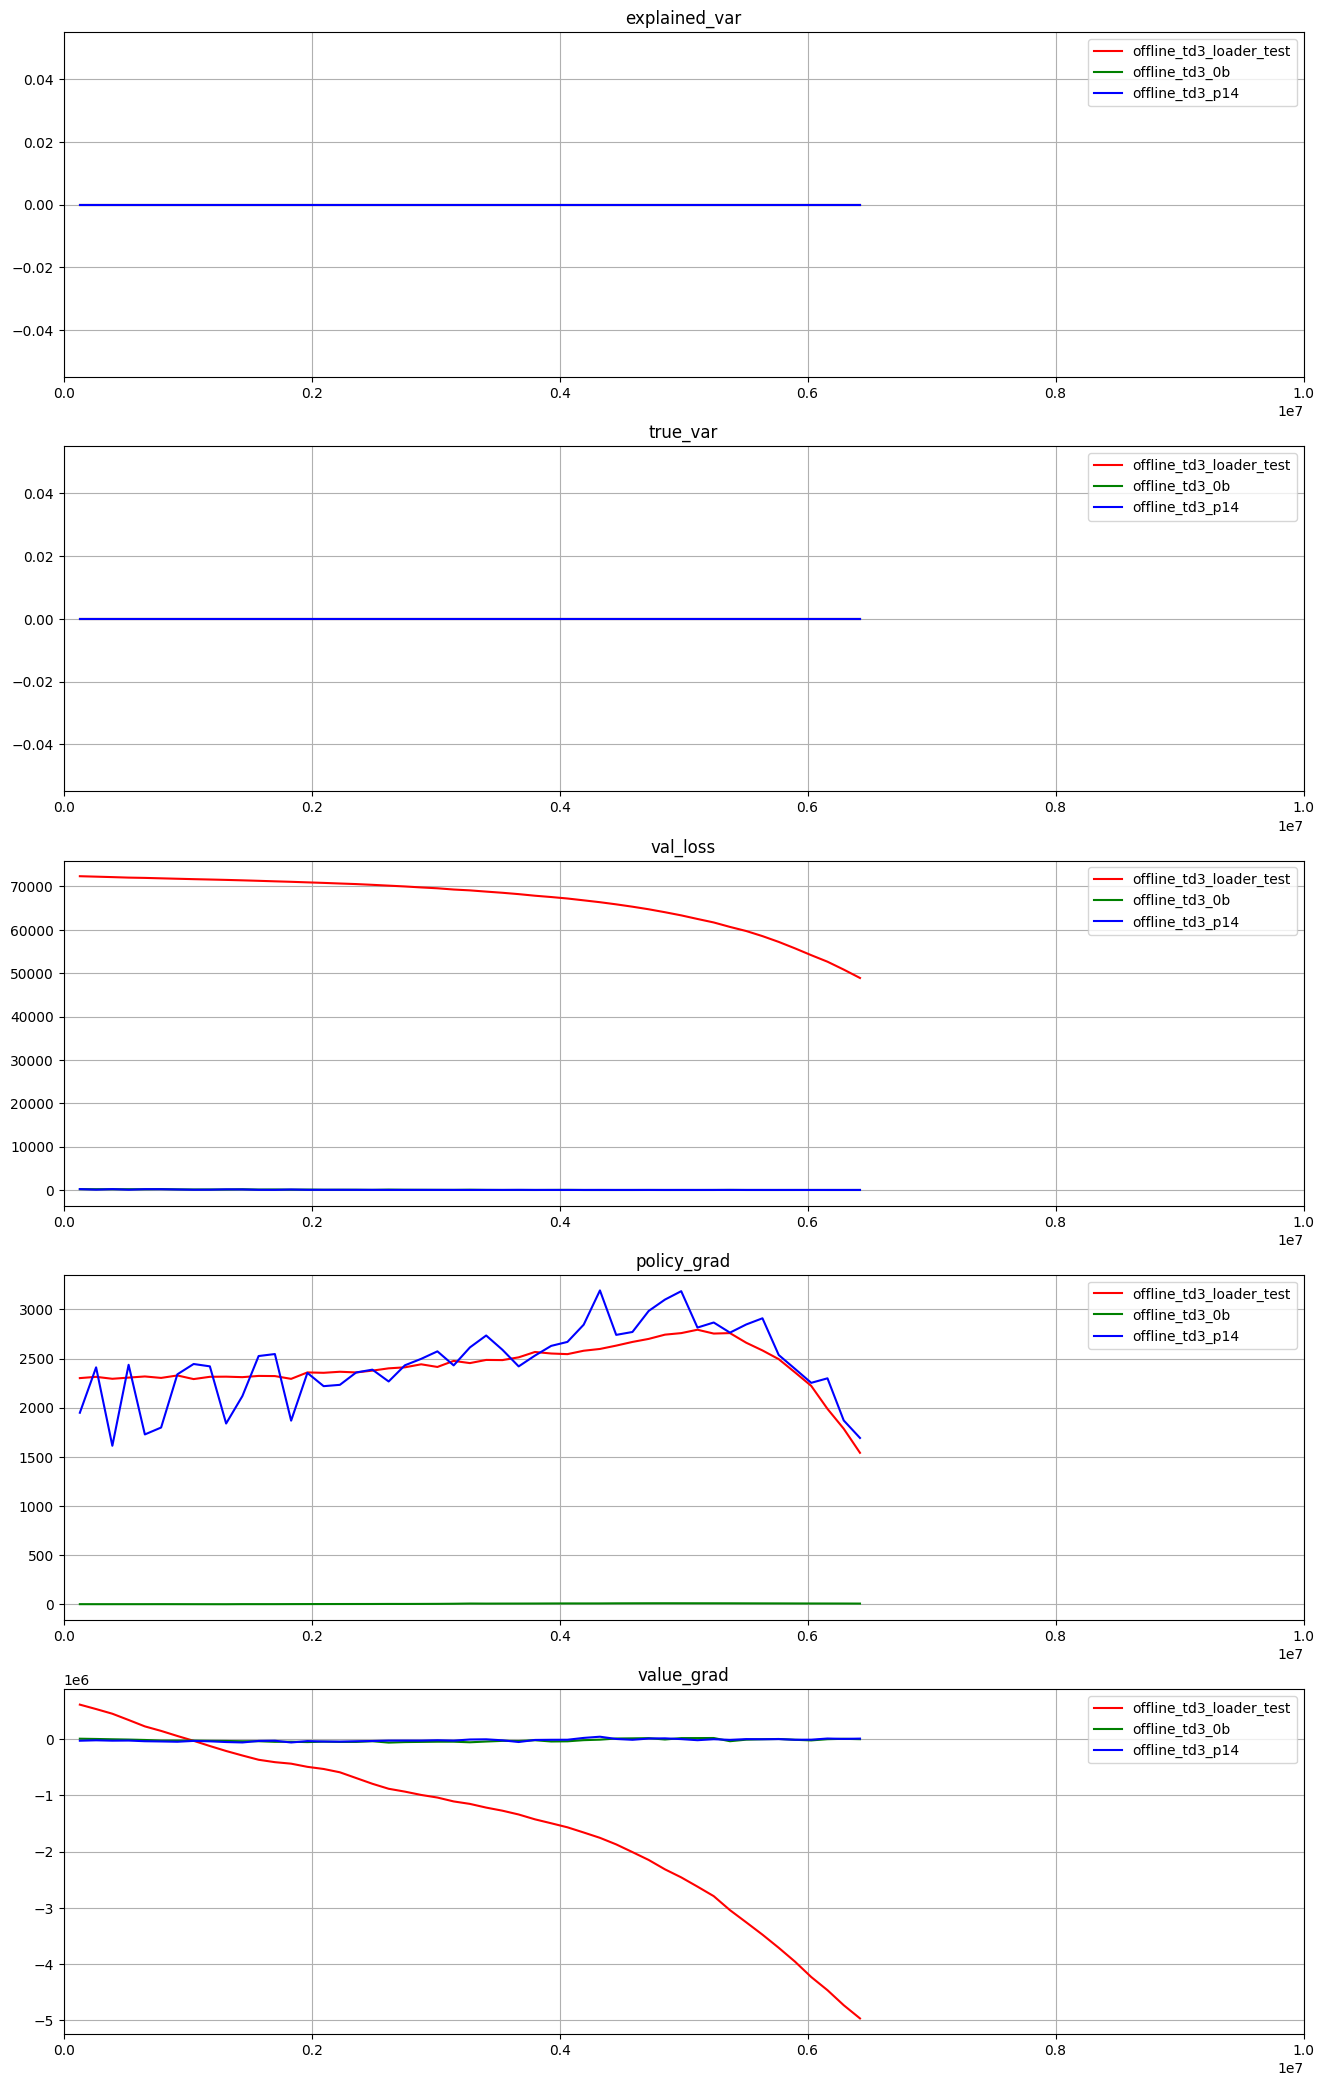

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = config('MAIN_PATH')
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

# EXP_NAME = 'offline_td3_debug' offline_td3_clinical
EXP_NAME = 'offline_td3_loader_test' 
#  # offline_td3_higher_alpha # #offline_td3_higher_alpha_3
EXP_NAME_2 = "offline_td3_0b"
EXP_NAME_3 = "offline_td3_p14"


# EXP_NAME = 'offline_td3_less_networks_adlscnt0'
# EXP_NAME_2 = 'offline_td3_less_networks_adlscnt4'
# EXP_NAME_3 = 'offline_td3_less_networks_adlscnt6'

COHORT = 'Adult'
SUBJECT = '0'

LABEL = COHORT+SUBJECT

SINGLE_VIEW = False


command = []
dis_len = 1.0 * 10000000 #1.0 * 1000000 /2 
disp_arr = display_commands_v2(command)


if SINGLE_VIEW:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL},
    }

    
    plot_testing_average_metric(exp_vis, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

else:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)
    exp2 = ExperimentVisualise(id=EXP_NAME_2, version=1.1, plot_version=1, test_seeds=5000)
    exp3 = ExperimentVisualise(id=EXP_NAME_3, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":exp1.id}, 
                '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":exp2.id},  
                '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":exp3.id}, 
    }

    plot_testing_average_metric({'1' : exp_vis['1']}, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)


# plot the graphs

# average metric


print(exp_vis['1'])


#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)
#plot_training_logs(exp_vis, dis_len, version=3)


# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='value_grad', goal=5, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='val_loss', goal=1.1, fill=False)

params = ['explained_var', 'true_var','val_loss', 'policy_grad', 'value_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
# params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
# params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


 Experiment summary...
{'epi': {48: 49}, 't': {48: 270}, 'reward': {48: 160.13625}, 'normo': {48: 16.296296296296298}, 'hypo': {48: 0.0}, 'sev_hypo': {48: 0.0}, 'hyper': {48: 23.33333333333333}, 'lgbi': {48: 0.0}, 'hgbi': {48: 40.66913}, 'ri': {48: 40.66913}, 'sev_hyper': {48: 60.37037037037037}, 'aBGP_rmse': {48: 0}, 'cBGP_rmse': {48: 0}}
{'epi': {48: 49}, 't': {48: 280}, 'reward': {48: 158.85616}, 'normo': {48: 19.642857142857142}, 'hypo': {48: 0.0}, 'sev_hypo': {48: 0.0}, 'hyper': {48: 17.857142857142858}, 'lgbi': {48: 0.0}, 'hgbi': {48: 43.24317}, 'ri': {48: 43.24317}, 'sev_hyper': {48: 62.5}, 'aBGP_rmse': {48: 0}, 'cBGP_rmse': {48: 0}}
{'epi': {48: 49}, 't': {48: 279}, 'reward': {48: 160.55417}, 'normo': {48: 17.56272401433692}, 'hypo': {48: 0.0}, 'sev_hypo': {48: 0.0}, 'hyper': {48: 21.14695340501792}, 'lgbi': {48: 0.0}, 'hgbi': {48: 42.43164}, 'ri': {48: 42.43164}, 'sev_hyper': {48: 61.29032258064516}, 'aBGP_rmse': {48: 0}, 'cBGP_rmse': {48: 0}}
{'epi': {48: 49}, 't': {48: 288}

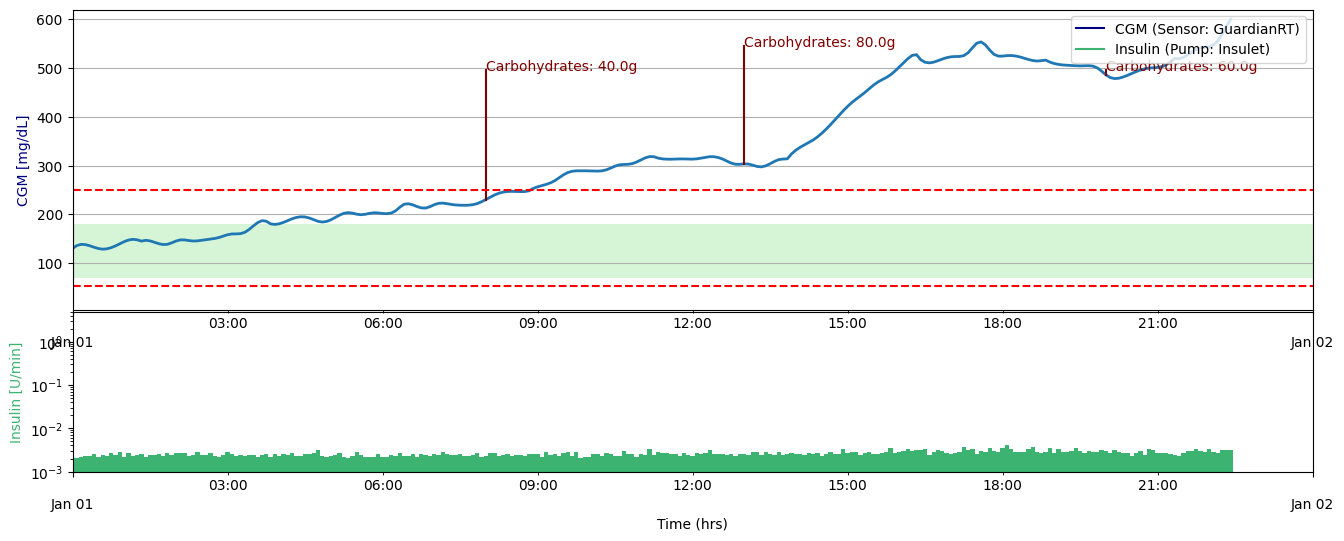

/testing/worker_episode_5001.csv
12075    0.002238
12076    0.002202
12077    0.002141
12078    0.002182
12079    0.002344
           ...   
12350    0.003048
12351    0.003090
12352    0.003448
12353    0.003698
12354    0.002969
Name: ins, Length: 280, dtype: float64


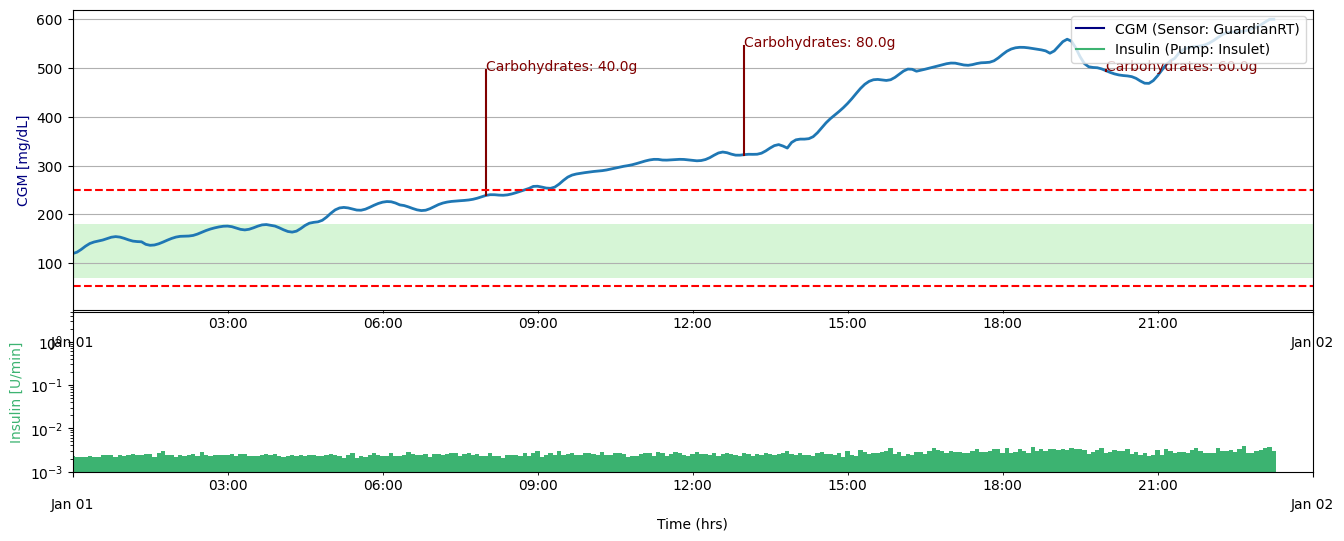

/testing/worker_episode_5002.csv
12379    0.002071
12380    0.002255
12381    0.002178
12382    0.002567
12383    0.002419
           ...   
12653    0.003158
12654    0.002764
12655    0.002628
12656    0.002756
12657    0.003750
Name: ins, Length: 279, dtype: float64


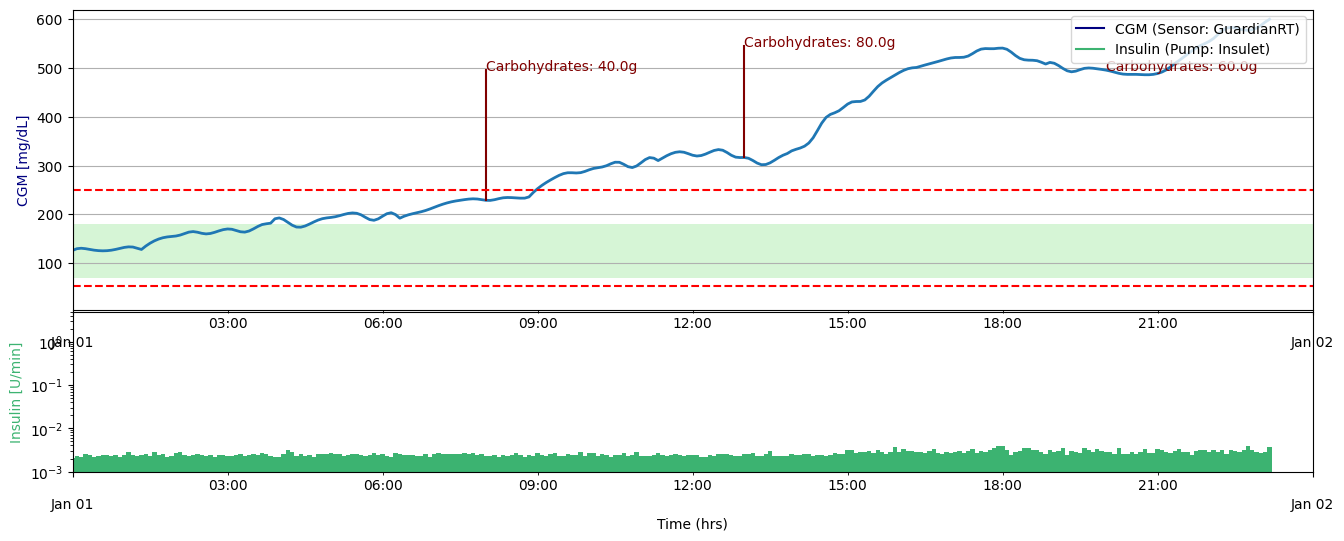

/testing/worker_episode_5003.csv
12243    0.002058
12244    0.002145
12245    0.002361
12246    0.002241
12247    0.002424
           ...   
12526    0.003252
12527    0.002852
12528    0.002705
12529    0.003006
12530    0.003268
Name: ins, Length: 288, dtype: float64


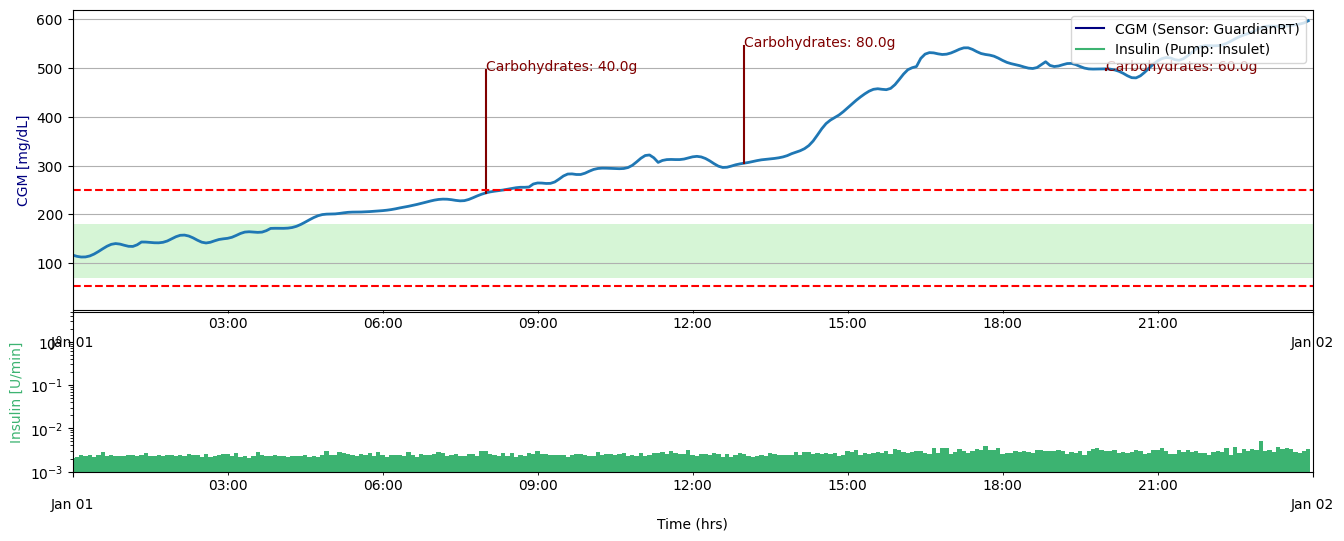

/testing/worker_episode_5004.csv
12369    0.002034
12370    0.002359
12371    0.002351
12372    0.002323
12373    0.002525
           ...   
12644    0.003282
12645    0.002996
12646    0.002826
12647    0.003056
12648    0.003453
Name: ins, Length: 280, dtype: float64


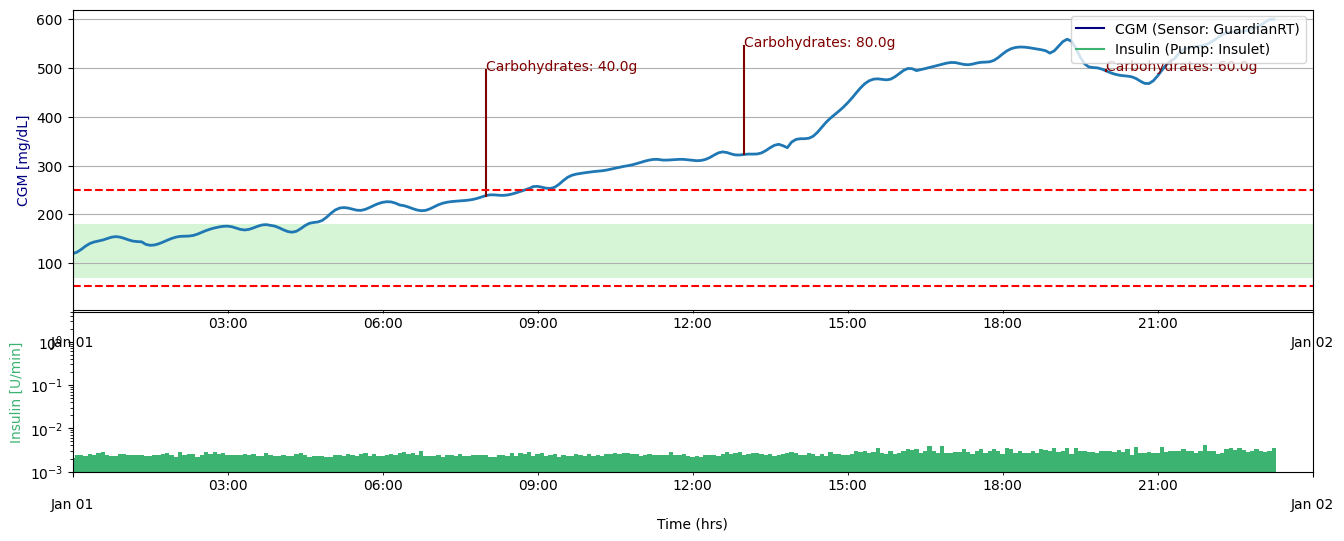

/testing/worker_episode_5005.csv
12029    0.002226
12030    0.002367
12031    0.002433
12032    0.002246
12033    0.002163
           ...   
12312    0.003201
12313    0.003317
12314    0.003633
12315    0.003569
12316    0.003564
Name: ins, Length: 288, dtype: float64


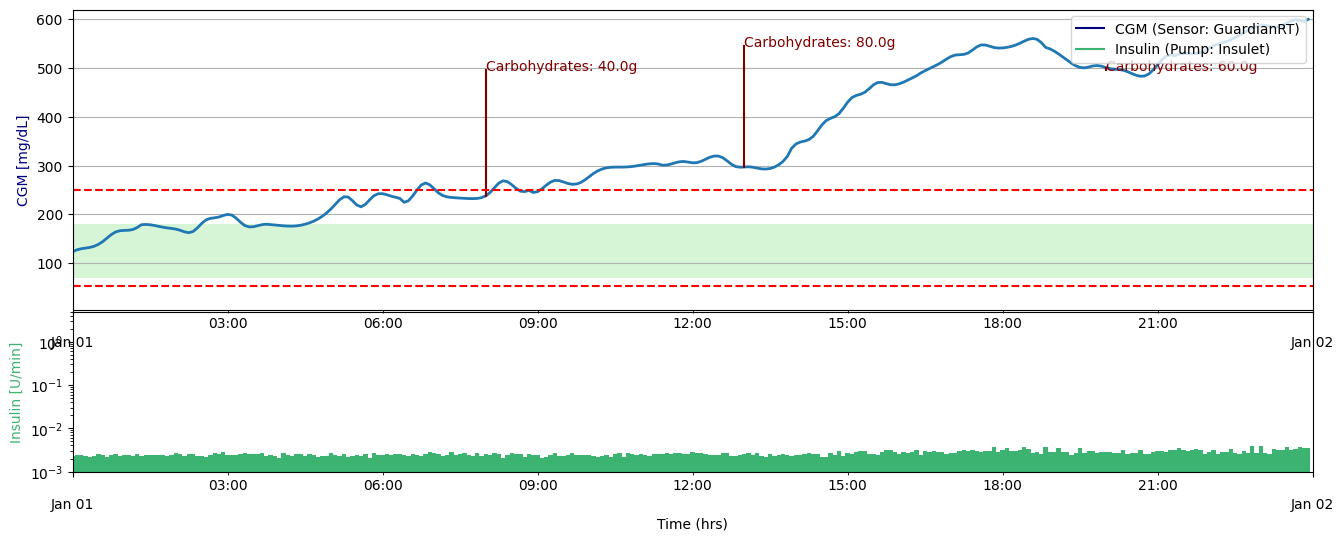

/testing/worker_episode_5006.csv
11962    0.002300
11963    0.002313
11964    0.002052
11965    0.002405
11966    0.002247
           ...   
12242    0.002647
12243    0.002670
12244    0.003058
12245    0.002768
12246    0.003125
Name: ins, Length: 285, dtype: float64


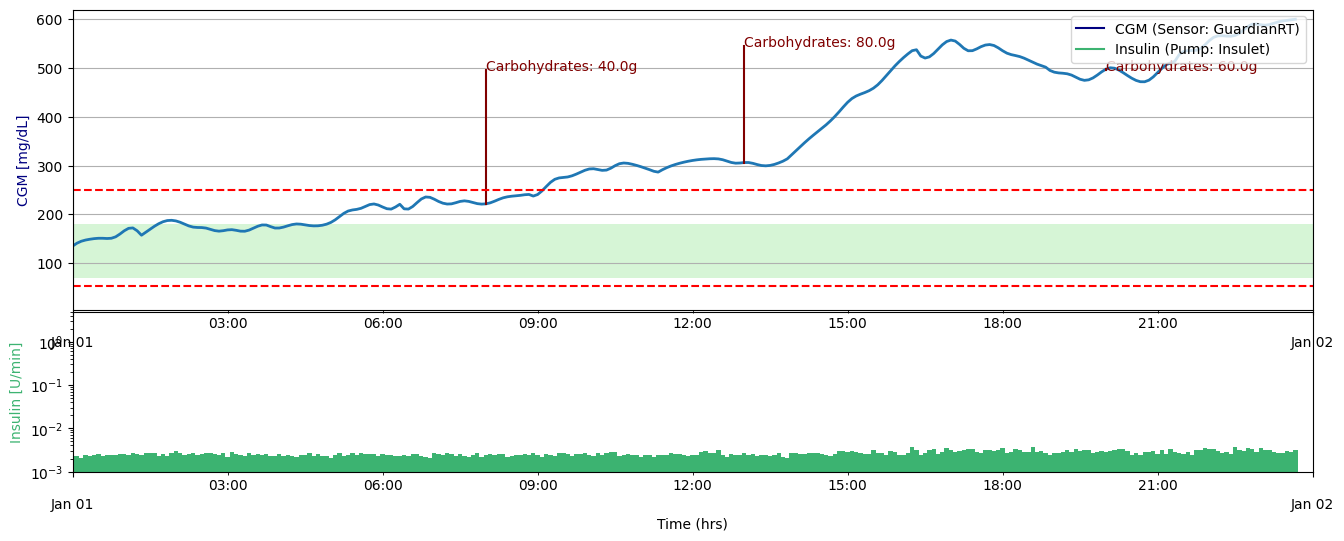

/testing/worker_episode_5007.csv
12146    0.002206
12147    0.002306
12148    0.002152
12149    0.002356
12150    0.002216
           ...   
12421    0.002862
12422    0.002964
12423    0.003322
12424    0.003731
12425    0.004203
Name: ins, Length: 280, dtype: float64


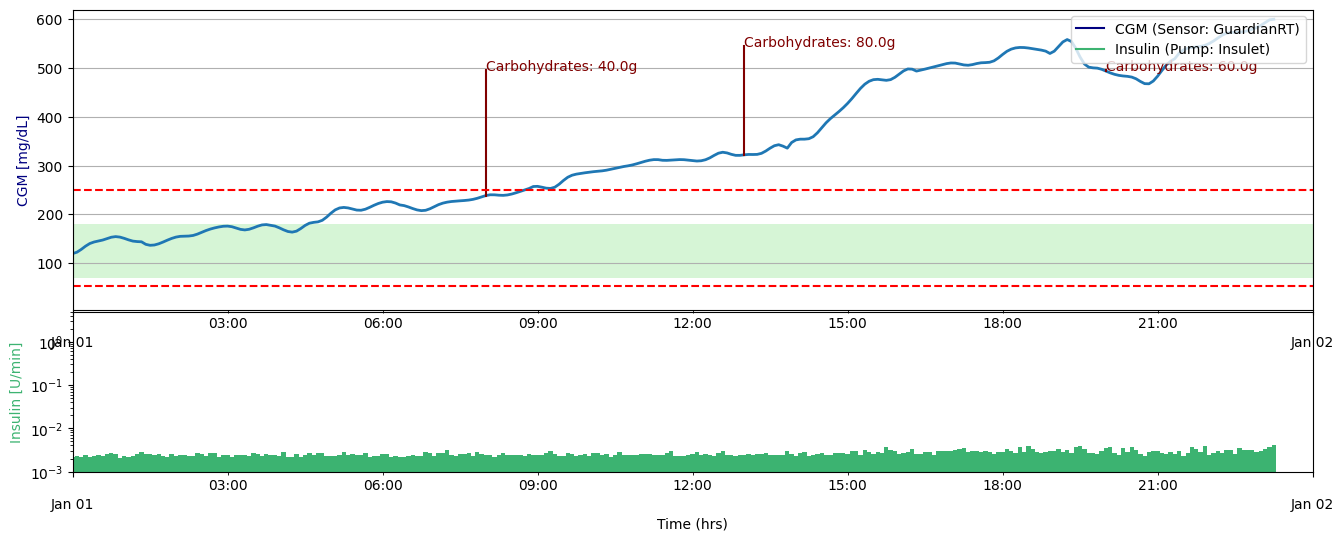

/testing/worker_episode_5008.csv
12110    0.002174
12111    0.001983
12112    0.002131
12113    0.002174
12114    0.002275
           ...   
12387    0.002387
12388    0.002969
12389    0.002737
12390    0.003647
12391    0.003938
Name: ins, Length: 282, dtype: float64


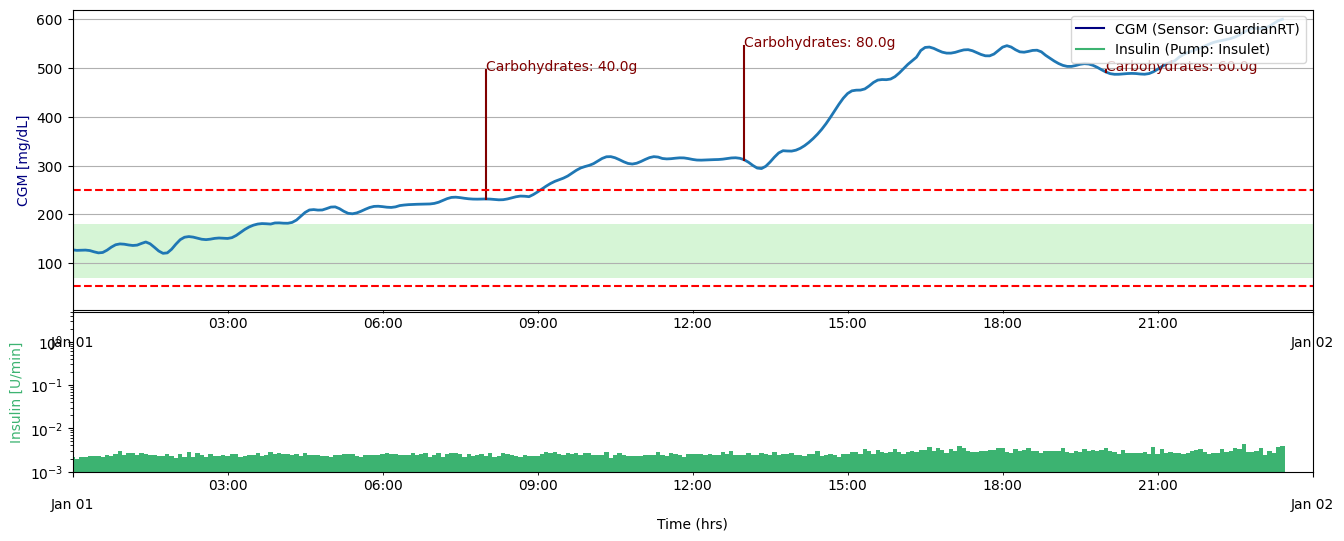

/testing/worker_episode_5009.csv
11980    0.002113
11981    0.002101
11982    0.002210
11983    0.002087
11984    0.002208
           ...   
12257    0.003245
12258    0.002894
12259    0.003581
12260    0.003071
12261    0.003302
Name: ins, Length: 282, dtype: float64


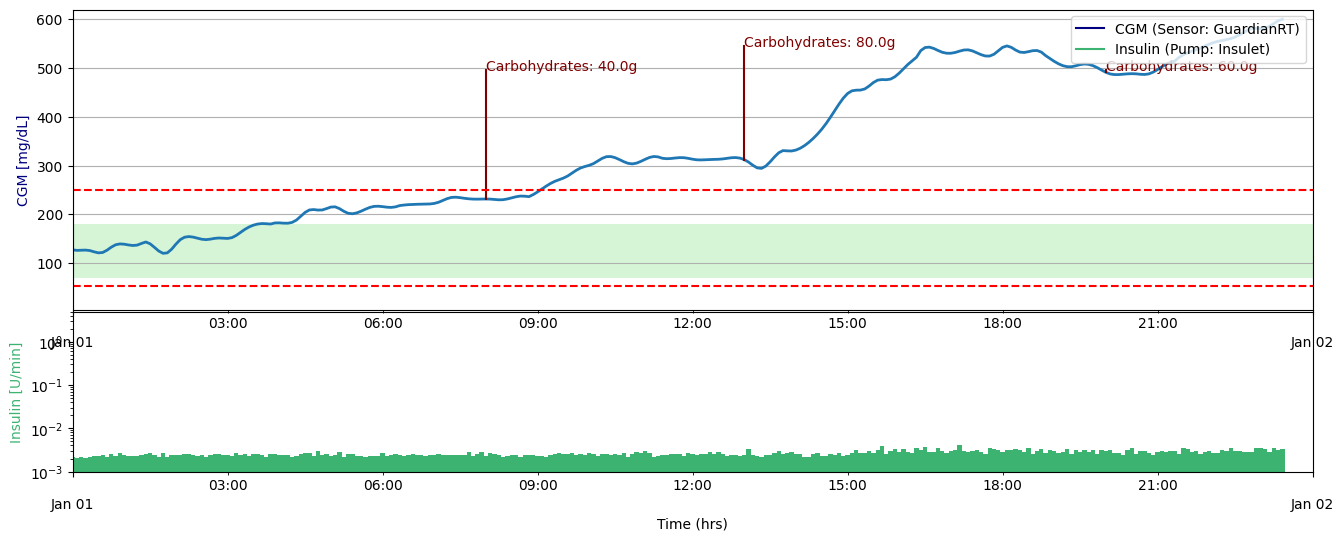

/testing/worker_episode_5010.csv
12310    0.002140
12311    0.002257
12312    0.002265
12313    0.002385
12314    0.002370
           ...   
12591    0.003234
12592    0.002938
12593    0.003099
12594    0.002759
12595    0.002724
Name: ins, Length: 286, dtype: float64


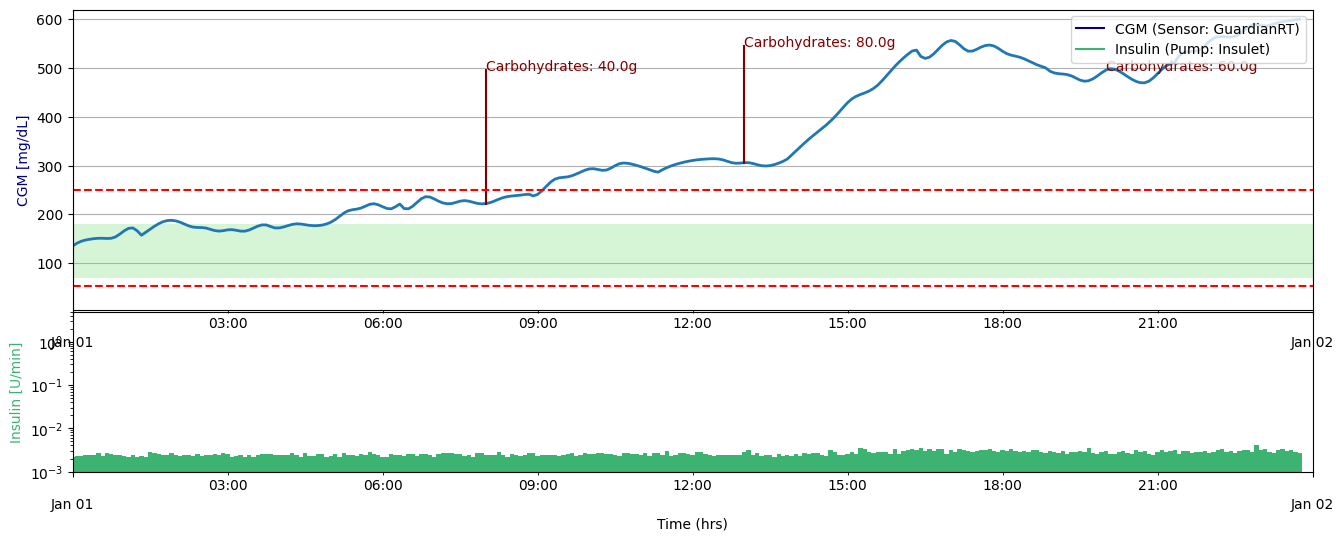

/testing/worker_episode_5011.csv
11873    0.002240
11874    0.002171
11875    0.002284
11876    0.002488
11877    0.002273
           ...   
12149    0.003588
12150    0.003141
12151    0.004063
12152    0.002803
12153    0.002978
Name: ins, Length: 281, dtype: float64


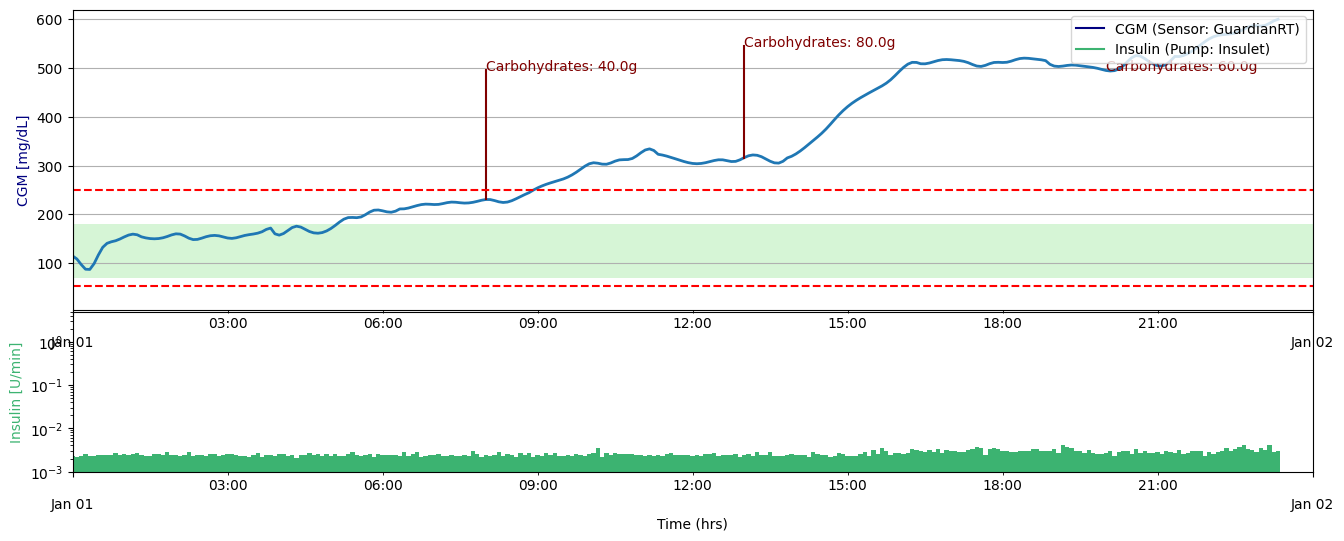

/testing/worker_episode_5012.csv
11894    0.002437
11895    0.002163
11896    0.002288
11897    0.002150
11898    0.002305
           ...   
12159    0.003105
12160    0.003071
12161    0.002903
12162    0.002894
12163    0.003125
Name: ins, Length: 270, dtype: float64


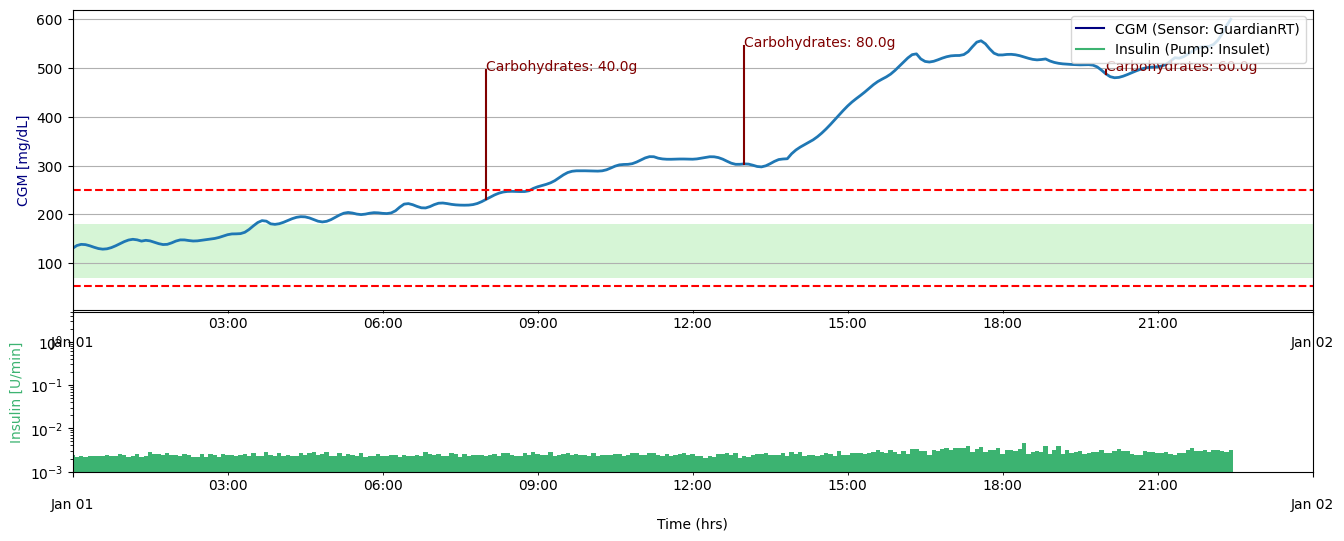

/testing/worker_episode_5013.csv
11889    0.002174
11890    0.002230
11891    0.002209
11892    0.002132
11893    0.002122
           ...   
12163    0.003674
12164    0.002908
12165    0.003709
12166    0.003577
12167    0.002850
Name: ins, Length: 279, dtype: float64


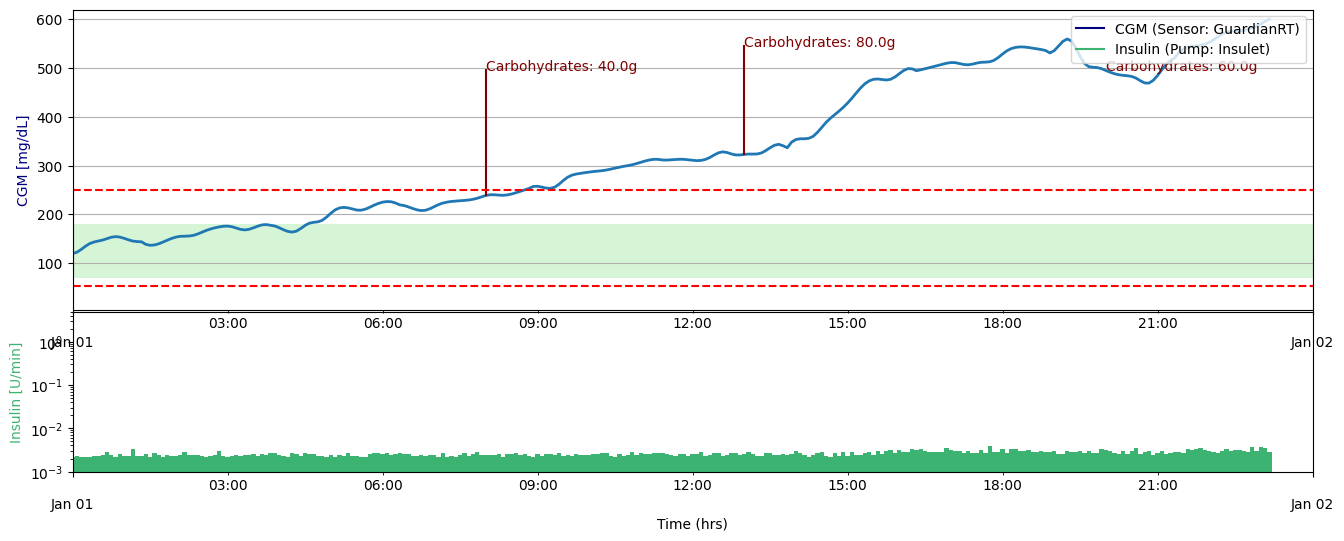

/testing/worker_episode_5014.csv
11965    0.002027
11966    0.002284
11967    0.002394
11968    0.002256
11969    0.002289
           ...   
12242    0.002953
12243    0.002805
12244    0.002594
12245    0.002852
12246    0.003183
Name: ins, Length: 282, dtype: float64


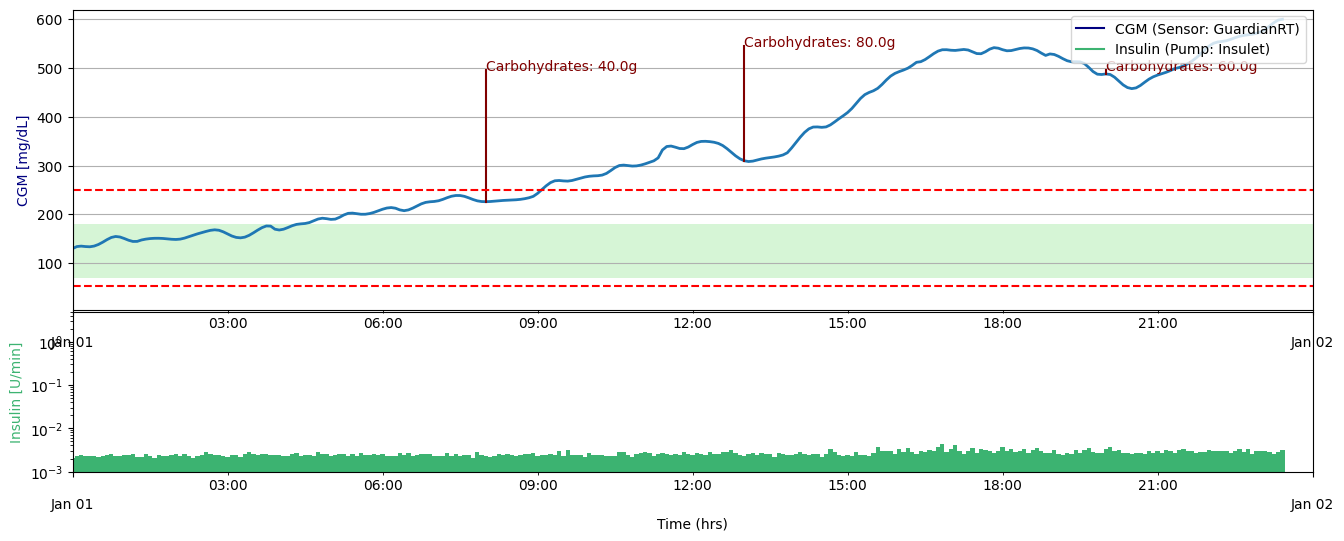

/testing/worker_episode_5015.csv
12249    0.002145
12250    0.002155
12251    0.002407
12252    0.002292
12253    0.002249
           ...   
12525    0.003101
12526    0.003290
12527    0.003076
12528    0.003471
12529    0.003255
Name: ins, Length: 281, dtype: float64


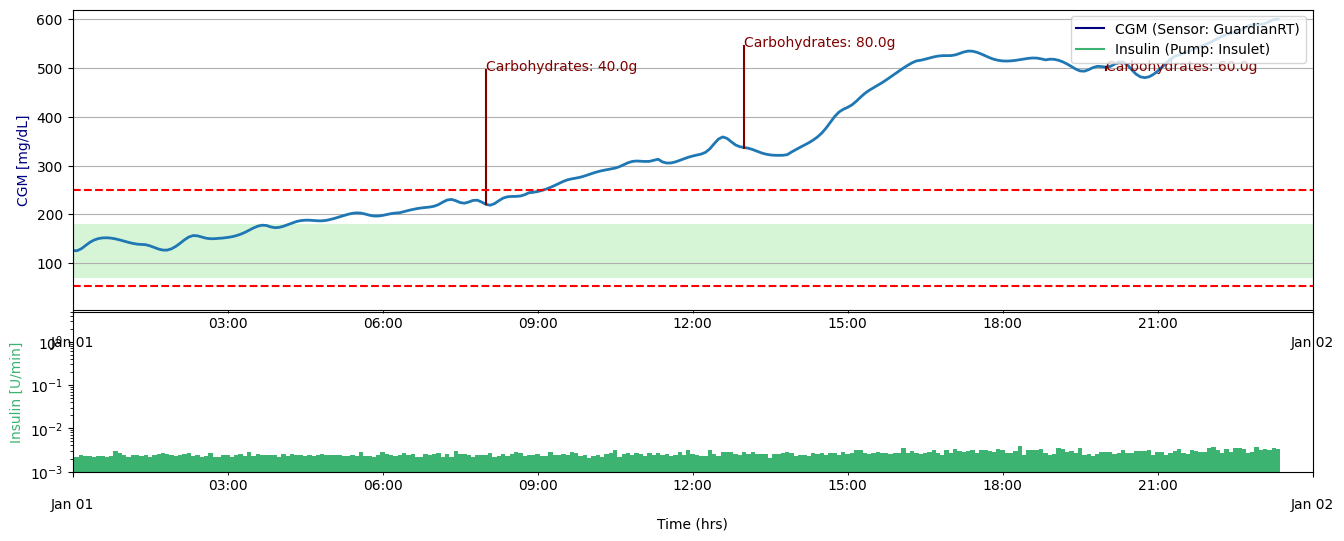

/testing/worker_episode_5016.csv
11720    0.002207
11721    0.002308
11722    0.002054
11723    0.002146
11724    0.002147
           ...   
12003    0.003980
12004    0.003051
12005    0.003213
12006    0.003464
12007    0.003096
Name: ins, Length: 288, dtype: float64


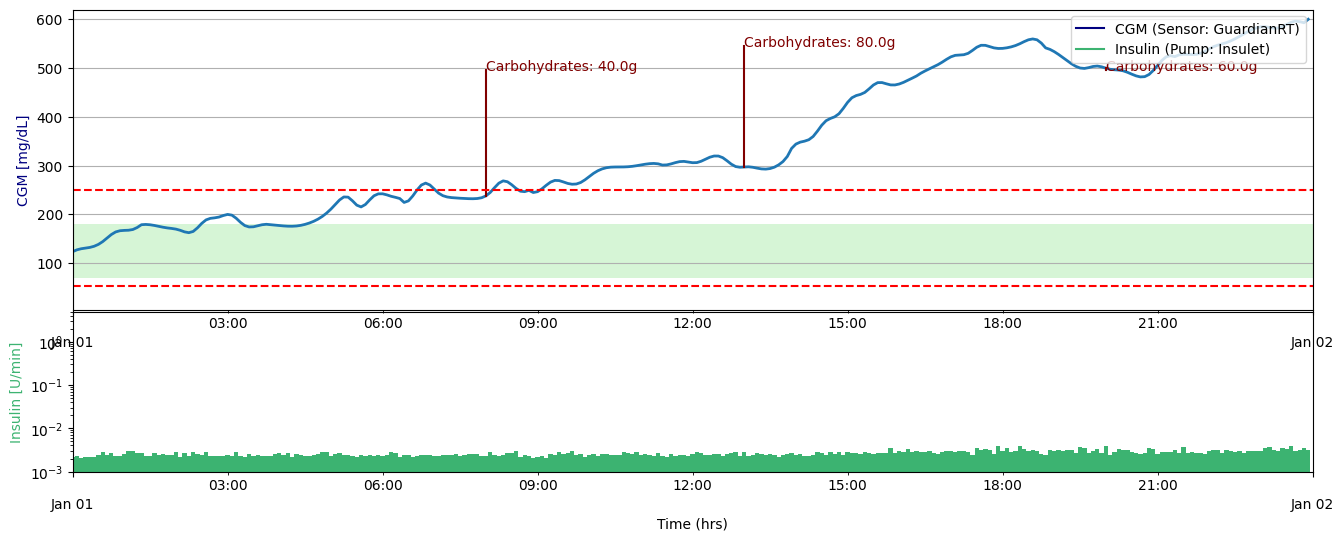

/testing/worker_episode_5017.csv
12133    0.002296
12134    0.002100
12135    0.002188
12136    0.002232
12137    0.002192
           ...   
12416    0.003609
12417    0.003084
12418    0.003031
12419    0.002902
12420    0.003446
Name: ins, Length: 288, dtype: float64


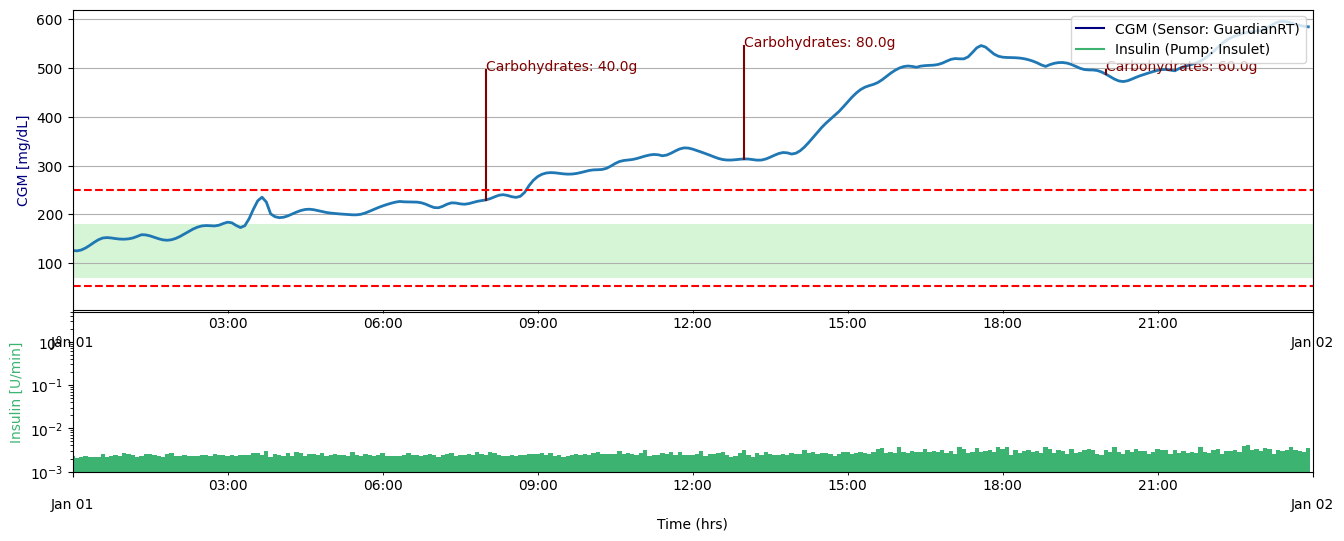

/testing/worker_episode_5018.csv
12164    0.002052
12165    0.002321
12166    0.002073
12167    0.002319
12168    0.002197
           ...   
12447    0.002722
12448    0.003512
12449    0.003219
12450    0.003030
12451    0.003399
Name: ins, Length: 288, dtype: float64


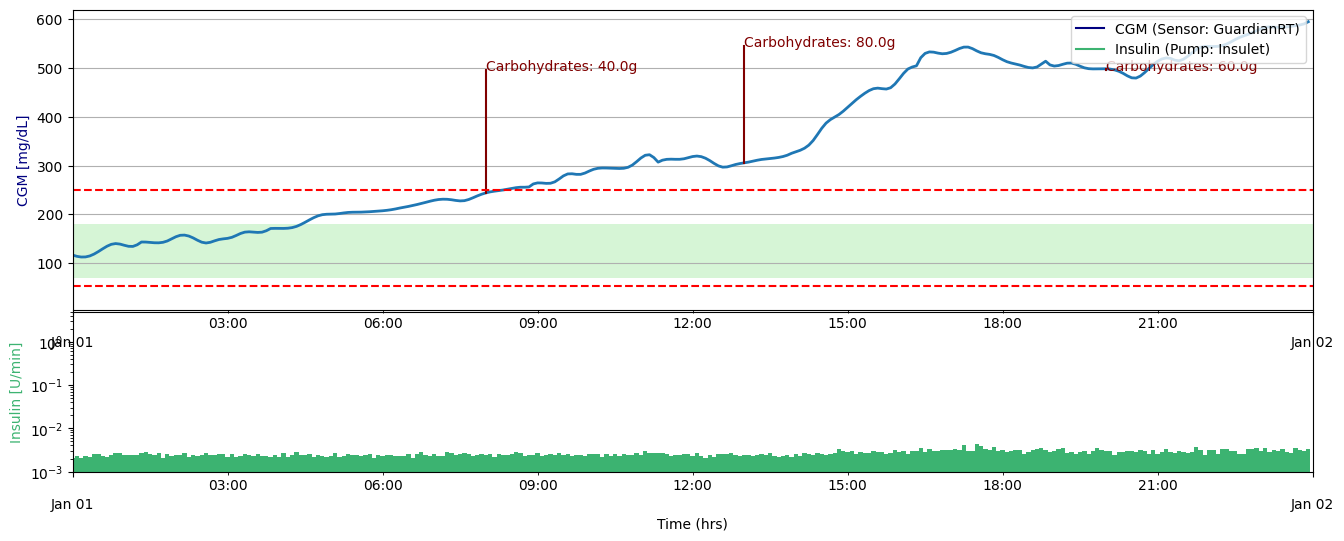

/testing/worker_episode_5019.csv
12423    0.002154
12424    0.002318
12425    0.002197
12426    0.002045
12427    0.002170
           ...   
12704    0.003277
12705    0.004225
12706    0.003366
12707    0.003025
12708    0.003210
Name: ins, Length: 286, dtype: float64


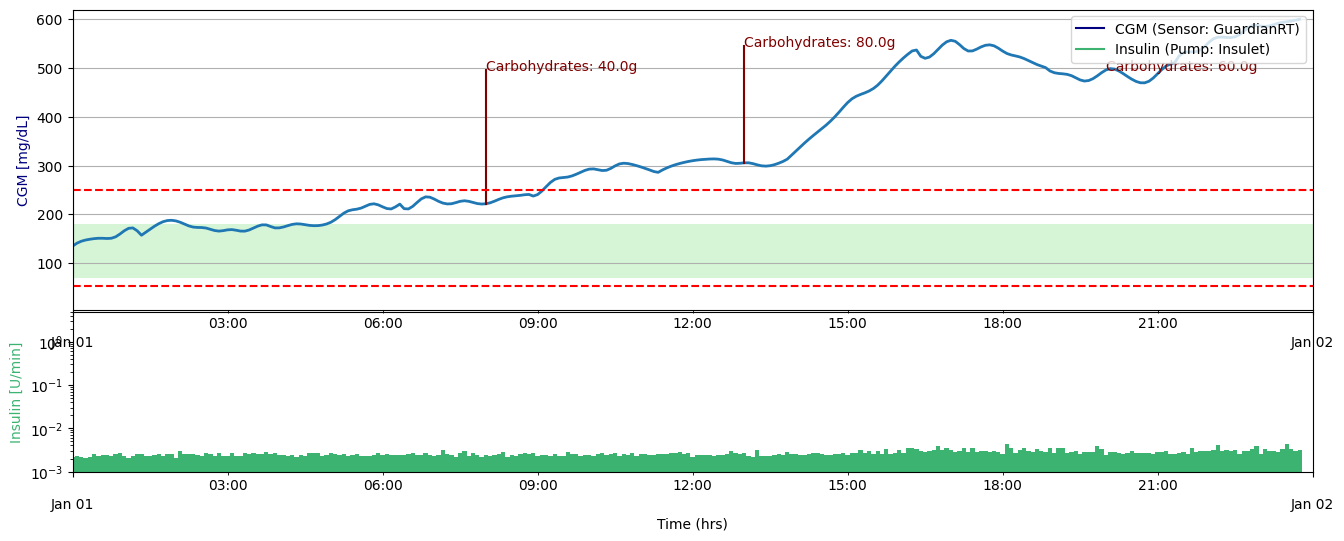

FileNotFoundError: [Errno 2] No such file or directory: '../../results/offline_td3_0a/training/worker_episode_0.csv'

In [2]:

## debugging a given experiment
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
# plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

real
690
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   71.053131   2.187724  24.952614   0.332676   1.473854   2.864151   
std    12.890716   3.592842  10.296977   1.084217   5.112085   3.235323   
min     8.860760   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  30.769230  71.551730  16.959064  80.590710  22.051207   

           hgbi         ri  
mean   7.620674  10.484825  
std    3.924464   6.169289  
min    1.789013   1.845144  
max   57.820187  76.844830  
quadratic
328
           normo       hypo      hyper   sev_hypo  sev_hyper       lgbi  \
mean   69.360132   1.064259  27.490189   0.161047   1.924372   1.790704   
std    12.350792   2.620374  10.311082   0.791841   5.182413   2.688906   
min     9.282701   0.000000   0.000000   0.000000   0.000000   0.000000   
max   100.000000  22.115385  69.551285  14.705882  80.590710  22.915808   

           hgbi         ri  
mean   8.071870   9.862574  
std    3.850129   5.74

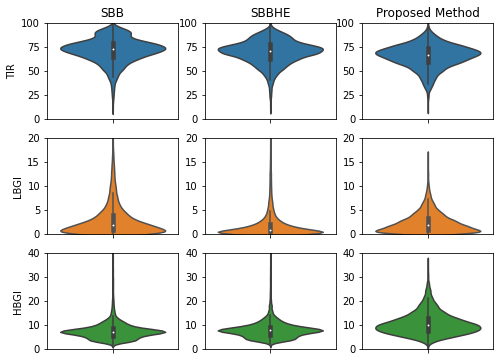

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()